# Gestión de la Educación Virtual
# Preparado por: Servio Palacios, Ph.D.
# 🔥 Introducción a PyTorch
En este cuaderno aprenderás los conceptos básicos de **PyTorch**, una biblioteca para construir modelos de aprendizaje profundo.

## Objetivos
- Crear y manipular tensores
- Realizar operaciones matemáticas
- Verificar el uso de GPU
- Crear y entrenar una red neuronal simple con datos simulados

## 1. Importar librerías necesarias

In [10]:
!pip install torch torchvision torchaudio
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

## 2. Crear y manipular tensores

In [3]:
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print("Tensor x:\n", x)

y = x ** 2 + 3
print("Tensor y:\n", y)

Tensor x:
 tensor([[1., 2.],
        [3., 4.]])
Tensor y:
 tensor([[ 4.,  7.],
        [12., 19.]])


## 3. Verificar disponibilidad de GPU

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

Usando dispositivo: cpu


## 4. Crear datos ficticios para clasificación

In [5]:
X = torch.randn(200, 4)
y = torch.randint(0, 3, (200,))  # 3 clases

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

## 5. Definir una red neuronal simple

In [6]:
class RedSimple(nn.Module):
    def __init__(self):
        super(RedSimple, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = RedSimple().to(device)
print(model)

RedSimple(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)


## 6. Entrenar el modelo

In [7]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(10):
    total_loss = 0
    for batch_x, batch_y in dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Época {epoch+1}, Pérdida total: {total_loss:.4f}")
    losses.append(total_loss)


Época 1, Pérdida total: 14.5553
Época 2, Pérdida total: 14.1901
Época 3, Pérdida total: 14.0202
Época 4, Pérdida total: 13.9520
Época 5, Pérdida total: 13.8356
Época 6, Pérdida total: 13.7393
Época 7, Pérdida total: 13.9158
Época 8, Pérdida total: 13.8492
Época 9, Pérdida total: 13.6624
Época 10, Pérdida total: 13.5777


## 7. Visualizar la pérdida de entrenamiento

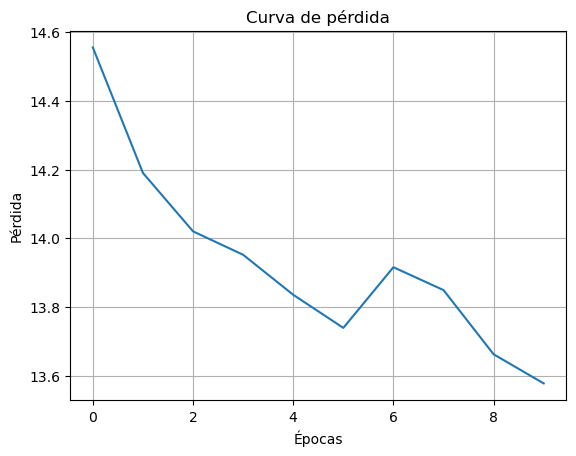

In [8]:
plt.plot(losses)
plt.title("Curva de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid()
plt.show()

## Reflexión
- ¿Qué aprendiste sobre PyTorch?
- ¿Qué parte fue más interesante?
- ¿Qué cambios podrías hacer al modelo para mejorarlo?